4423680/4422102 [==============================] - 0s 0us/step
6
Dữ liệu y ban đầu  6
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5,

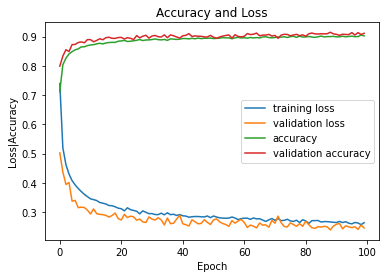

313/313 [==============================] - 2s 6ms/step - loss: 0.2620 - accuracy: 0.9043
[0.2620014548301697, 0.9042999744415283]


In [1]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.models import Sequential
import keras.layers as layers
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
import tensorflow as tf

# Load dữ liệu MNIST
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0
X_train = tf.expand_dims(X_train, 3)
X_test = tf.expand_dims(X_test, 3)
X_val = tf.expand_dims(X_val, 3)

print(Y_train[0])

# One hot encoding label 󰀀
print('Dữ liệu y ban đầu ', Y_train[0])
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)
Y_val= np_utils.to_categorical(Y_val, 10)
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

model = Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=X_train[0].shape))
model.add(layers.MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.4))


model.add(layers.Flatten())

model.add(layers.Dense(units=256, activation='relu'))


model.add(layers.Dense(units=256, activation='relu'))


model.add(layers.Dense(units=10, activation = 'softmax'))

model.summary()


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


train_datagen = ImageDataGenerator(rotation_range=20)
img_set_train = train_datagen.flow(X_train,Y_train)
H = model.fit(img_set_train,
                    epochs=100,
                    validation_data=train_datagen.flow(X_val, Y_val),
                    steps_per_epoch=1000,
                    verbose=1)


numOfEpoch = len(H.history['loss'])
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()
plt.show()


# 9. Đánh giá model với dữ liệu test set
score = model.evaluate(train_datagen.flow(X_test, Y_test))
print(score)